In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',110)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings('ignore')
import io
import missingno as msno
%matplotlib inline

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift
from sklearn import decomposition

In [2]:
df = pd.read_csv('players_22.csv', index_col = 'sofifa_id')
df

player_url  \
sofifa_id                                                      
158023     https://sofifa.com/player/158023/lionel-messi/...   
188545     https://sofifa.com/player/188545/robert-lewand...   
20801      https://sofifa.com/player/20801/c-ronaldo-dos-...   
190871     https://sofifa.com/player/190871/neymar-da-sil...   
192985     https://sofifa.com/player/192985/kevin-de-bruy...   
...                                                      ...   
261962     https://sofifa.com/player/261962/defu-song/220002   
262040     https://sofifa.com/player/262040/caoimhin-port...   
262760     https://sofifa.com/player/262760/nathan-logue/...   
262820     https://sofifa.com/player/262820/luke-rudden/2...   
264540     https://sofifa.com/player/264540/emanuel-lalch...   

                   short_name                            long_name  \
sofifa_id                                                            
158023               L. Messi       Lionel Andrés Messi Cuccittini   
188545         R. Lewandowski                   Robert Lewandowski   
20801       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
190871              Neymar Jr        Neymar da Silva Santos Júnior   
192985           K. De Bruyne                      Kevin De Bruyne   
...                       ...                                  ...   
261962              Song Defu                                  宋德福   
262040              C. Porter                      Caoimhin Porter   
262760               N. Logue              Nathan Logue-Cunningham   
262820              L. Rudden                          Luke Rudden   
264540     E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

          player_positions  overall  potential    value_eur  wage_eur  age  \
sofifa_id                                                                    
158023          RW, ST, CF       93         93   78000000.0  320000.0   34   
188545                  ST       92         92  119500000.0  270000.0   32   
20801               ST, LW       91         91   45000000.0  270000.0   36   
190871             LW, CAM       91         91  129000000.0  270000.0   29   
192985             CM, CAM       91         91  125500000.0  350000.0   30   
...                    ...      ...        ...          ...       ...  ...   
261962                 CDM       47         52      70000.0    1000.0   22   
262040                  CM       47         59     110000.0     500.0   19   
262760                  CM       47         55     100000.0     500.0   21   
262820                  ST       47         60     110000.0     500.0   19   
264540                 CAM       47         60     110000.0     500.0   19   

                  dob  height_cm  weight_kg  club_team_id  \
sofifa_id                                                   
158023     1987-06-24        170         72          73.0   
188545     1988-08-21        185         81          21.0   
20801      1985-02-05        187         83          11.0   
190871     1992-02-05        175         68          73.0   
192985     1991-06-28        181         70          10.0   
...               ...        ...        ...           ...   
261962     1999-01-02        180         64      112541.0   
262040     2002-03-18        175         70         445.0   
262760     2000-02-07        178         72      111131.0   
262820     2002-04-23        173         66      111131.0   
264540     2002-02-06        167         61      113040.0   

                     club_name                     league_name  league_level  \
sofifa_id                                                                      
158023     Paris Saint-Germain                  French Ligue 1           1.0   
188545       FC Bayern München            German 1. Bundesliga           1.0   
20801        Manchester United          English Premier League           1.0   
190871     Paris Saint-Germain                  French Ligue 1           1.0   
192985         Ma

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19239 entries, 158023 to 264540
Columns: 109 entries, player_url to nation_flag_url
dtypes: float64(16), int64(43), object(50)
memory usage: 16.1+ MB


In [4]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

value_eur                     0.384635
wage_eur                      0.317064
club_team_id                  0.317064
club_name                     0.317064
league_name                   0.317064
league_level                  0.317064
club_position                 0.317064
club_jersey_number            0.317064
club_loaned_from             94.272052
club_joined                   6.045013
club_contract_valid_until     0.317064
nation_team_id               96.054889
nation_position              96.054889
nation_jersey_number         96.054889
release_clause_eur            6.112584
player_tags                  92.510006
player_traits                51.151307
pace                         11.081657
shooting                     11.081657
passing                      11.081657
dribbling                    11.081657
defending                    11.081657
physic                       11.081657
goalkeeping_speed            88.918343
club_logo_url                 0.317064
club_flag_url            

### Aqui arriba vemos rapidamente que existen 7 columnas con mas del 80% de los datos como nan, por lo que procederemos a eliminarlas

In [5]:
df = df.drop(columns = ['nation_logo_url','player_tags','player_traits',
                        'nation_jersey_number','nation_position','nation_team_id','club_loaned_from',
                       'goalkeeping_speed'])

### Tambien eliminamos columnas que no aportan valor alguno al estudio actual

In [6]:
df = df.drop(columns = ['player_url','long_name','club_position','nationality_id','player_face_url',
                        'club_logo_url','club_flag_url','nation_flag_url','body_type', 'real_face'])


### Analizamos valores faltantes en el dataset

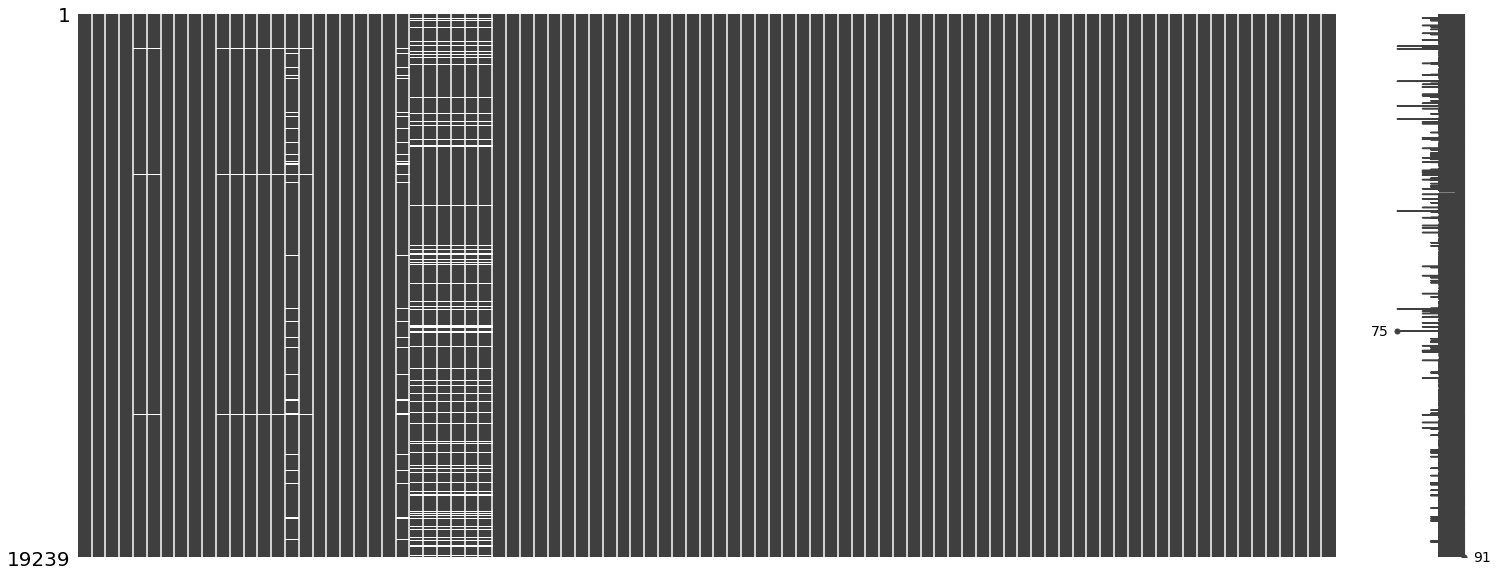

In [7]:
msno.matrix(df);

In [8]:
df.describe().T

count          mean           std      min  \
overall                      19239.0  6.577218e+01  6.880232e+00     47.0   
potential                    19239.0  7.107937e+01  6.086213e+00     49.0   
value_eur                    19165.0  2.850452e+06  7.613700e+06   9000.0   
wage_eur                     19178.0  9.017989e+03  1.947018e+04    500.0   
age                          19239.0  2.521082e+01  4.748235e+00     16.0   
height_cm                    19239.0  1.812997e+02  6.863179e+00    155.0   
weight_kg                    19239.0  7.494303e+01  7.069434e+00     49.0   
club_team_id                 19178.0  5.058050e+04  5.440187e+04      1.0   
league_level                 19178.0  1.354364e+00  7.478651e-01      1.0   
club_jersey_number           19178.0  2.094525e+01  1.790937e+01      1.0   
club_contract_valid_until    19178.0  2.022764e+03  1.213203e+00   2021.0   
weak_foot                    19239.0  2.946151e+00  6.715605e-01      1.0   
skill_moves                  19239.0  2.352461e+00  7.676590e-01      1.0   
international_reputation     19239.0  1.094184e+00  3.710982e-01      1.0   
release_clause_eur           18063.0  5.374044e+06  1.494837e+07  16000.0   
pace                         17107.0  6.821307e+01  1.093315e+01     28.0   
shooting                     17107.0  5.234530e+01  1.405162e+01     18.0   
passing                      17107.0  5.731256e+01  1.006897e+01     25.0   
dribbling                    17107.0  6.256117e+01  9.651312e+00     27.0   
defending                    17107.0  5.170363e+01  1.618975e+01     14.0   
physic                       17107.0  6.482329e+01  9.791886e+00     29.0   
attacking_crossing           19239.0  4.957742e+01  1.803466e+01      6.0   
attacking_finishing          19239.0  4.589443e+01  1.972102e+01      2.0   
attacking_heading_accuracy   19239.0  5.178388e+01  1.729418e+01      5.0   
attacking_short_passing      19239.0  5.886798e+01  1.449086e+01      7.0   
attacking_volleys            19239.0  4.246385e+01  1.765333e+01      3.0   
skill_dribbling              19239.0  5.566043e+01  1.878459e+01      4.0   
skill_curve                  19239.0  4.726893e+01  1.818109e+01      6.0   
skill_fk_accuracy            19239.0  4.224903e+01  1.717859e+01      4.0   
skill_long_passing           19239.0  5.307225e+01  1.502657e+01      9.0   
skill_ball_control           19239.0  5.847201e+01  1.666372e+01      8.0   
movement_acceleration        19239.0  6.465289e+01  1.516740e+01     14.0   
movement_sprint_speed        19239.0  6.471490e+01  1.496543e+01     15.0   
movement_agility             19239.0  6.350008e+01  1.486228e+01     18.0   
movement_reactions           19239.0  6.145002e+01  9.042281e+00     25.0   
movement_balance             19239.0  6.406861e+01  1.432479e+01     15.0   
power_shot_power             19239.0  5.777686e+01  1.319222e+01     20.0   
power_jumping                19239.0  6.481350e+01  1.212298e+01     22.0   
power_stamina                19239.0  6.308488e+01  1.614528e+01     12.0   
power_strength               19239.0  6.500774e+01  1.266352e+01     19.0   
power_long_shots             19239.0  4.664270e+01  1.941158e+01      4.0   
mentality_aggression         19239.0  5.553896e+01  1.697218e+01     10.0   
mentality_interceptions      19239.0  4.661355e+01  2.067708e+01      3.0   
mentality_positioning        19239.0  5.033021e+01  1.962160e+01      2.0   
mentality_vision             19239.0  5.396460e+01  1.365048e+01     10.0   
mentality_penalties          19239.0  4.785872e+01  1.576858e+01      7.0   
mentality_composure          19239.0  5.792983e+01  1.215933e+01     12.0   
defending_marking_awareness  19239.0  4.660175e+01  2.020081e+01      4.0   
defending_standing_tackle    19239.0  4.804558e+01  2.123272e+01      5.0   
defending_sliding_tackle     19239.0  4.590670e+01  2.075568e+01      5.0   
goalkeeping_diving           19239.0  1.640610e+01  1.757403e+01      2.0   
goalkeeping_handling       

### Distribucion de la edad en los jugadores:

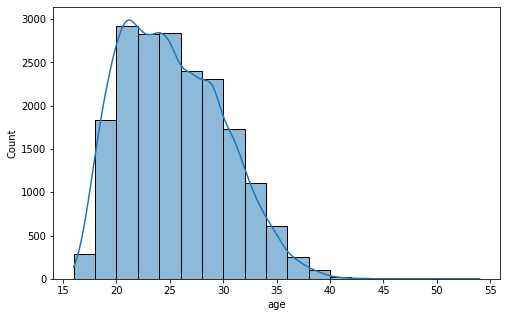

In [18]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'age',bins = 10, kde = True, binwidth = 2);

### Distribucion del overall (puntaje) de los jugadores:

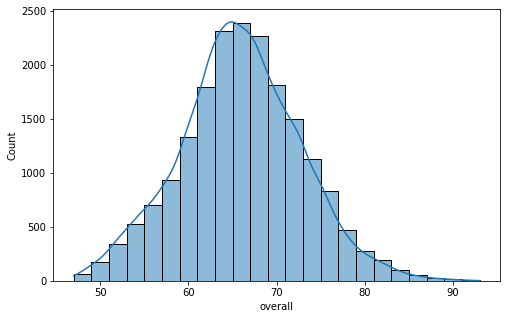

In [19]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'overall',bins = 10, kde = True, binwidth = 2);

### Nivel de liga se encuentran los jugadores, la mayoria estan en un nivel 1; osea la mas competetiva:

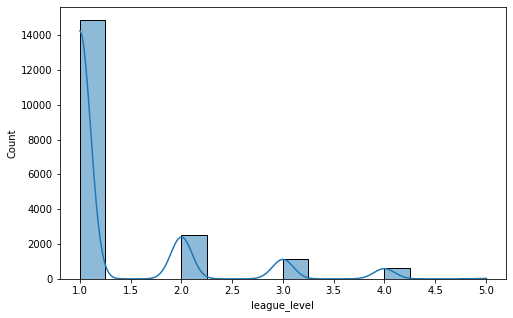

In [24]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'league_level', kde = True);

### Notamos que ahora los jugadores tienen mas de una posicion, a diferencia del dataset del fifa 19. Para fines utiles y practicos vamos a quedarnos tan solo con la posicion principal de cada jugador. La cual es la primera de cada fila:

In [12]:
df.player_positions.head()

sofifa_id
158023    RW, ST, CF
188545            ST
20801         ST, LW
190871       LW, CAM
192985       CM, CAM
Name: player_positions, dtype: object

In [13]:
df[['Posicion','posicion2','posicion3']] = df.player_positions.str.split(pat = ',', expand = True)
df = df.drop(columns = ['player_positions','posicion2','posicion3'])
df.Posicion.head()

sofifa_id
158023    RW
188545    ST
20801     ST
190871    LW
192985    CM
Name: Posicion, dtype: object

### Mejor jugador por cada posicion:

In [14]:
best_players_per_position = df.loc[df.groupby(df['Posicion'])['overall'].idxmax()][['Posicion',
                                                                                     'short_name','overall']]
best_players_per_position

Posicion           short_name  overall
sofifa_id                                       
212198         CAM      Bruno Fernandes       88
203376          CB          V. van Dijk       89
215914         CDM             N. Kanté       90
165153          CF           K. Benzema       89
192985          CM         K. De Bruyne       91
200389          GK             J. Oblak       91
216267          LB         A. Robertson       87
200104          LM               H. Son       89
190871          LW            Neymar Jr       91
202884         LWB        L. Spinazzola       83
231281          RB  T. Alexander-Arnold       87
233049          RM            J. Sancho       87
158023          RW             L. Messi       93
220093         RWB          H. Hateboer       81
188545          ST       R. Lewandowski       92

### Conteo de jugadores por cada posicion:

In [15]:
pd.DataFrame(df.Posicion.value_counts())

Posicion
CB       3339
ST       2608
CM       2173
GK       2132
CDM      1665
LB       1360
RB       1346
CAM      1151
RM       1028
LM       1016
RW        495
LW        435
RWB       178
LWB       171
CF        142

### Aqui abajo vemos los clubes que tienen el mejor promedio de overall

In [16]:
club_avg_overall = df.groupby('club_name')['overall'].mean().reset_index().sort_values('overall',ascending = False)
club_avg_overall

club_name    overall
368                           Juventus  79.961538
470                Paris Saint-Germain  79.454545
358                              Inter  78.857143
241                  FC Bayern München  78.071429
412                  Manchester United  78.000000
509                     Real Madrid CF  77.757576
434                             Napoli  77.500000
63                            Atalanta  77.480000
512                      Real Sociedad  77.280000
546                         SL Benfica  76.931034
411                    Manchester City  76.906250
239                       FC Barcelona  76.787879
69                  Atlético de Madrid  76.718750
10                            AC Milan  76.714286
135                            Chelsea  76.363636
264                           FC Porto  76.153846
403                          Liverpool  75.969697
572                         Sevilla FC  75.848485
93                   Borussia Dortmund  75.677419
598                        Sporting CP  75.480000
293                           Flamengo  75.400000
508                Real Betis Balompié  75.121212
23                           AS Monaco  75.111111
398                     Leicester City  75.000000
79                 Bayer 04 Leverkusen  74.888889
666                      Villarreal CF  74.878788
391                              Lazio  74.781250
183             Clube Atlético Mineiro  74.200000
630                  Tottenham Hotspur  74.090909
467                          Palmeiras  74.000000
231                            Everton  73.878788
455                 Olympique Lyonnais  73.866667
36                                Ajax  73.827586
64             Athletic Club de Bilbao  73.733333
520                               Roma  73.656250
58                             Arsenal  73.636364
619                          São Paulo  73.450000
490                      RB Bragantino  73.450000
292                         Fiorentina  73.407407
544                    SK Slavia Praha  73.285714
491                         RB Leipzig  73.281250
389                         LOSC Lille  73.266667
360                      Internacional  73.150000
662                      VfL Wolfsburg  72.968750
652                        Valencia CF  72.939394
494          RCD Espanyol de Barcelona  72.848485
399            Levante Unión Deportiva  72.818182
465                                PSV  72.766667
517                        River Plate  72.750000
637               U.S. Sassuolo Calcio  72.740741
448                           OGC Nice  72.703704
636                     U.C. Sampdoria  72.600000
341                      Hellas Verona  72.481481
454                     Olympiacos CFP  72.428571
224                Eintracht Frankfurt  72.354839
642                     Udinese Calcio  72.346154
321                             Grêmio  72.300000
288                      Fenerbahçe SK  72.285714
107                         CA Osasuna  72.212121
143          Club Athletico Paranaense  72.200000
679                    West Ham United  72.181818
318                         Granada CF  72.151515
606                   Stade Rennais FC  72.074074
13                     AC Sparta Praha  72.038462
515                 Real Valladolid CF  72.000000
84                         Beşiktaş JK  71.965517
573                   Shakhtar Donetsk  71.892857
621                     TSG Hoffenheim  71.878788
89                        Boca Juniors  71.857143
594    Sport Club Corinthians Paulista  71.800000
221                        Dynamo Kyiv  71.785714
160                     Club Brugge KV  71.714286
563                             Santos  71.700000
95            Borussia Mönchengladbach  71.606061
311                          Getafe CF  71.566667
205                   Deportivo Alavés  71.555556
632                        Trabzonspor  71.535714
628                        Torino F.C.  71.516129
295                         Fluminense  71.500000
504                         R

### Aqui comparamos dos habilidades (disparo al arco y pase), y a su vez creamos dos colores para diferenciar los jugadores que son derechos (naranjas) y los jugadores que son zurdos (azules)

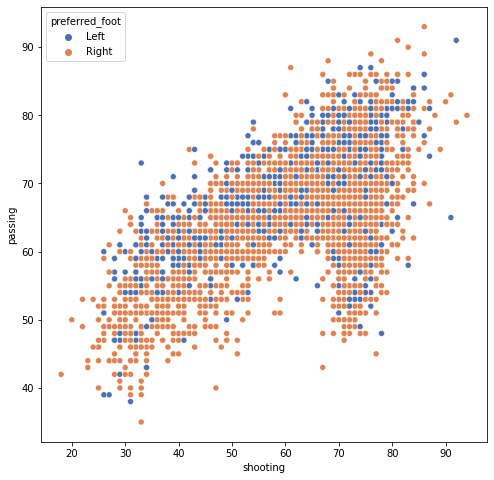

In [30]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df_n, x = 'shooting', y = 'passing', hue = 'preferred_foot', palette = 'deep');

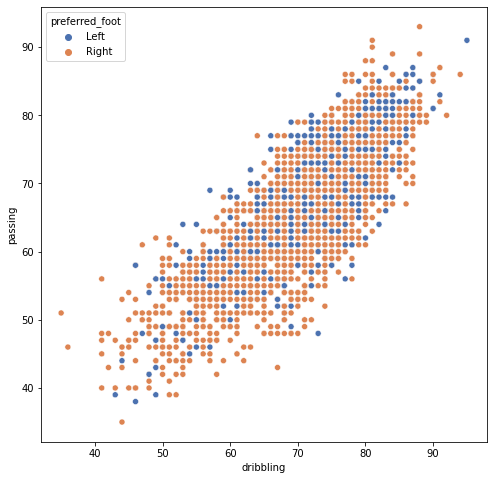

In [31]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df_n, x = 'dribbling', y = 'passing', hue = 'preferred_foot', palette = 'deep');

### Procedemos a reducir la base de datos. Dejando jugadores tan solo con un overall mayor a 70. Y tan solo algunas columnas seleccionadas
### Tambien creamos variables separando las skills segun el puesto.

In [123]:
n = 10000

df_n = df.iloc[:n]
df_n = df_n[(df_n['overall']>70)]

# Aqui abajo creamos una variable llamada Posicion2, donde resuma las posiciones de los jugadores
# en tan solo 4 posiciones
Delantero = ['RF','ST','LW','LF','RS','LS','RM','LM','RW']
Mediocampista = ['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
Defensor = ['RCB','CB','LCB','LB','RB','RWB','LWB']
Arquero = ['GK']

def pos2(posicion):
    if posicion in forwards:
        return 'Delantero'
    elif posicion in midfielders:
        return 'Mediocampista'
    elif posicion in defenders:
        return 'Defensor'
    elif posicion in goalkeepers:
        return 'Arquero'
    
    else:
        return 'nan'
    
df_n['Posicion2'] = df_n['Posicion'].apply(lambda x: pos2(x))

# Creamos un objeto con todas las skills
skills_ra = [ 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

# Skills de arquero:
skills_gk = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','Posicion2']

# Skills de defensor:
skills_def = [ 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle','Posicion2']
# Skills de atacantes:
skills_at = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing', 'Posicion2']

# Skills de mediocampo:
skills_mid = ['skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'Posicion2']

# Skills de Movimiento y balance
skills_movement = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'Posicion2']

# Skills de Fuerza
skills_power = ['power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'Posicion2']

# Skills Mentales
skills_mental = ['mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'Posicion2']


print(len(skills_ra), 'Variables numericas de desempeño segun habilidades')

40 Variables numericas de desempeño segun habilidades


### Procedemos a crear al jugador perfecto, y al jugador promedio:

In [124]:
MachineGunDict = {'short_name':'MachineGun','overall':99}
for skills in skills_ra:
    MachineGunDict [skills] = 99
    
df_n = df_n.append(MachineGunDict, ignore_index = True)

JugadorPromedioDict = {'short_name':'Promedio','overall':df_n.overall.mean()}
for skills in skills_ra:
    JugadorPromedioDict [skills] = df_n[skills].mean()
    
df_n = df_n.append(JugadorPromedioDict, ignore_index = True)

In [125]:
df_skills = df_n[skills_ra+ ['Posicion2']]

### Aqui visualizamos las skills propias de arqueros comparandolas para todos

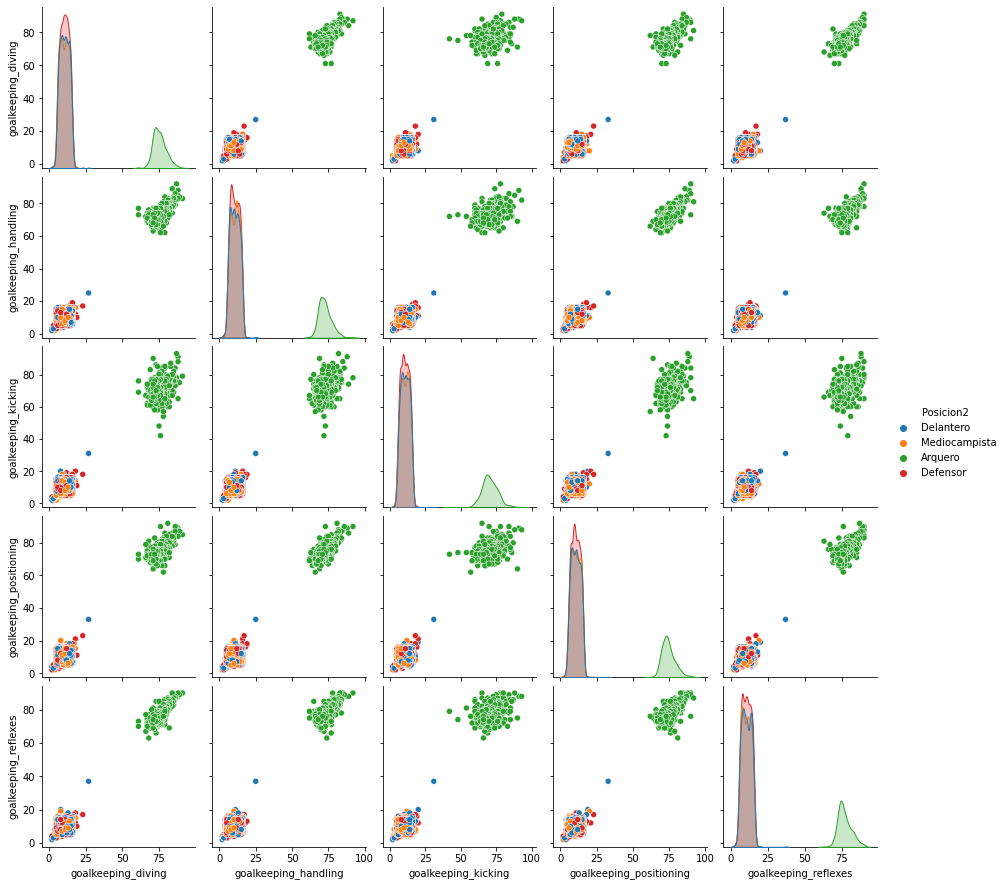

In [126]:
sns.pairplot(df_skills[skills_gk], hue = 'Posicion2');

### Aqui visualizamos las skills propias de defensores comparandolas para todos

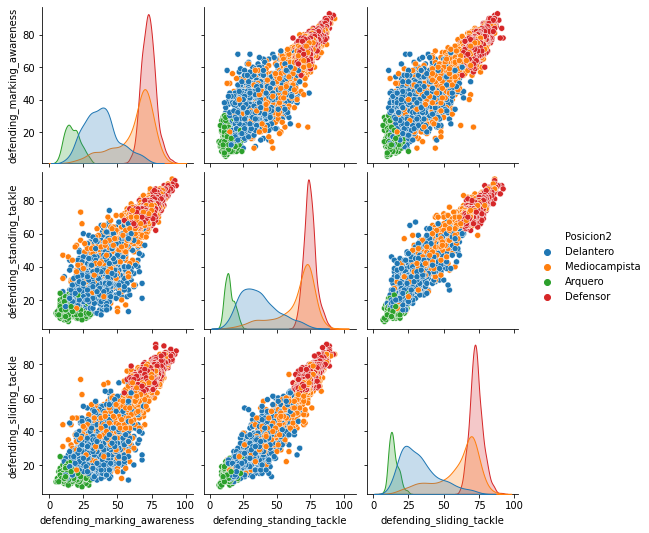

In [116]:
sns.pairplot(df_skills[skills_def], hue ='Posicion2');

### Aqui visualizamos las skills propias de mediocampistas comparandolas para todos

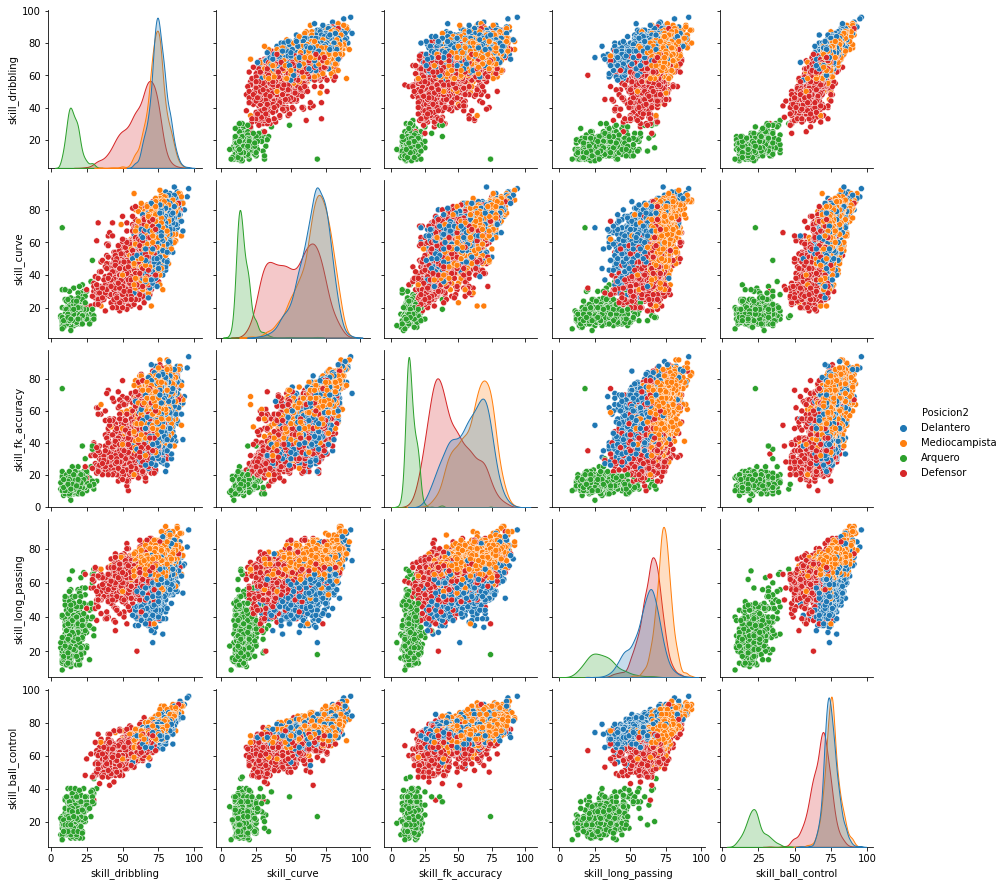

In [117]:
sns.pairplot(df_skills[skills_mid], hue = 'Posicion2');

### Aqui visualizamos las skills propias de delanteros comparandolas para todos

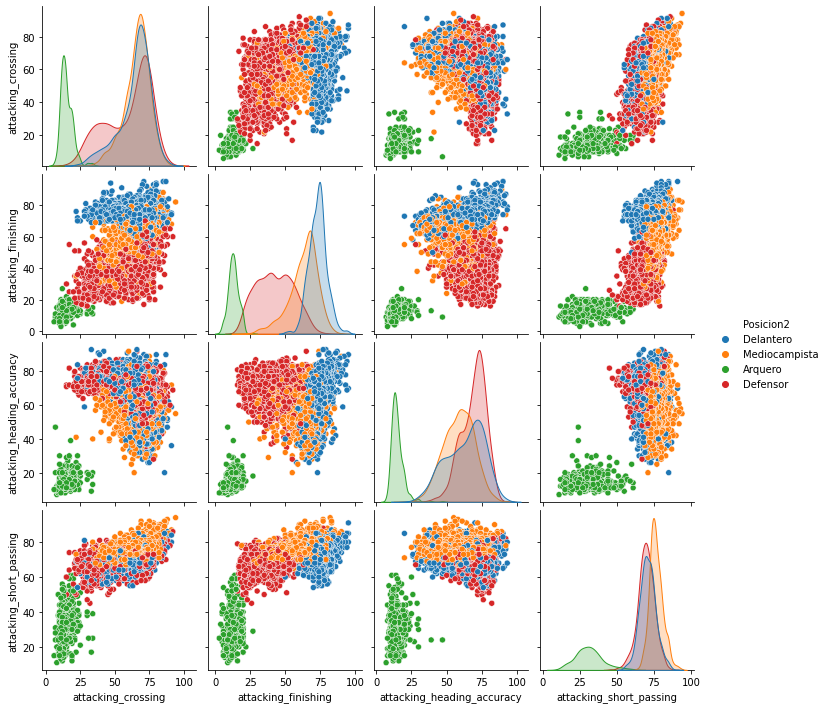

In [118]:
sns.pairplot(df_skills[skills_at], hue = 'Posicion2');

### Aqui visualizamos las skills propias de agilidad y movimientos

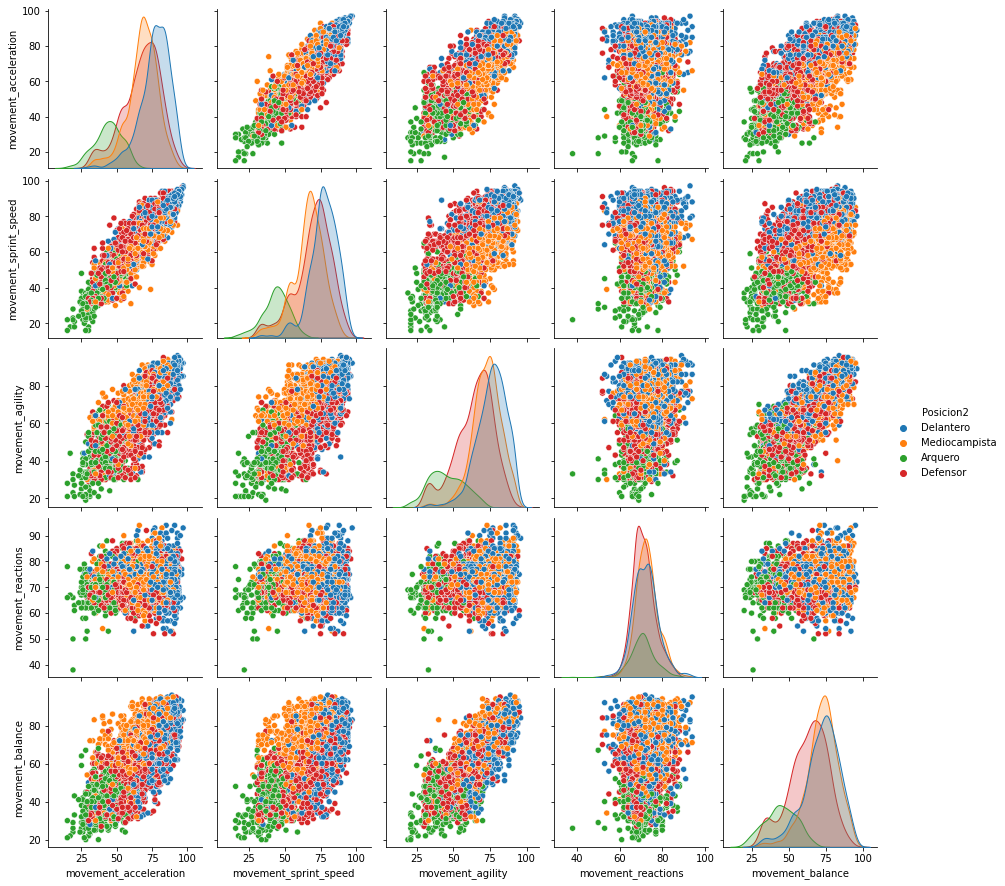

In [119]:
sns.pairplot(df_skills[skills_movement], hue = 'Posicion2');

### Aqui visualizamos las skills de mentalidad

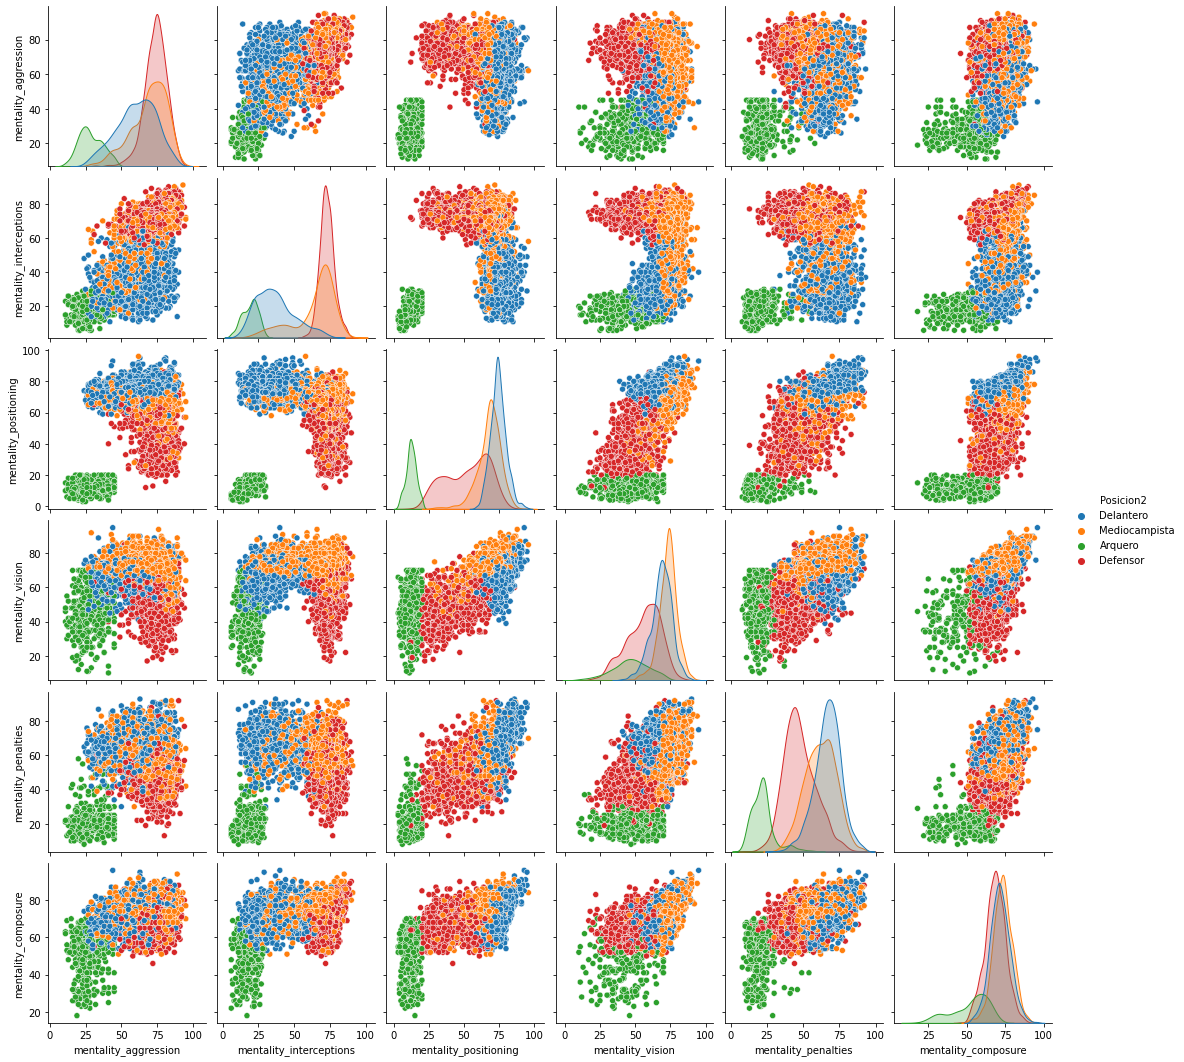

In [120]:
sns.pairplot(df_skills[skills_mental], hue = 'Posicion2');

### Aqui visualizamos las skills de potencia y fuerza

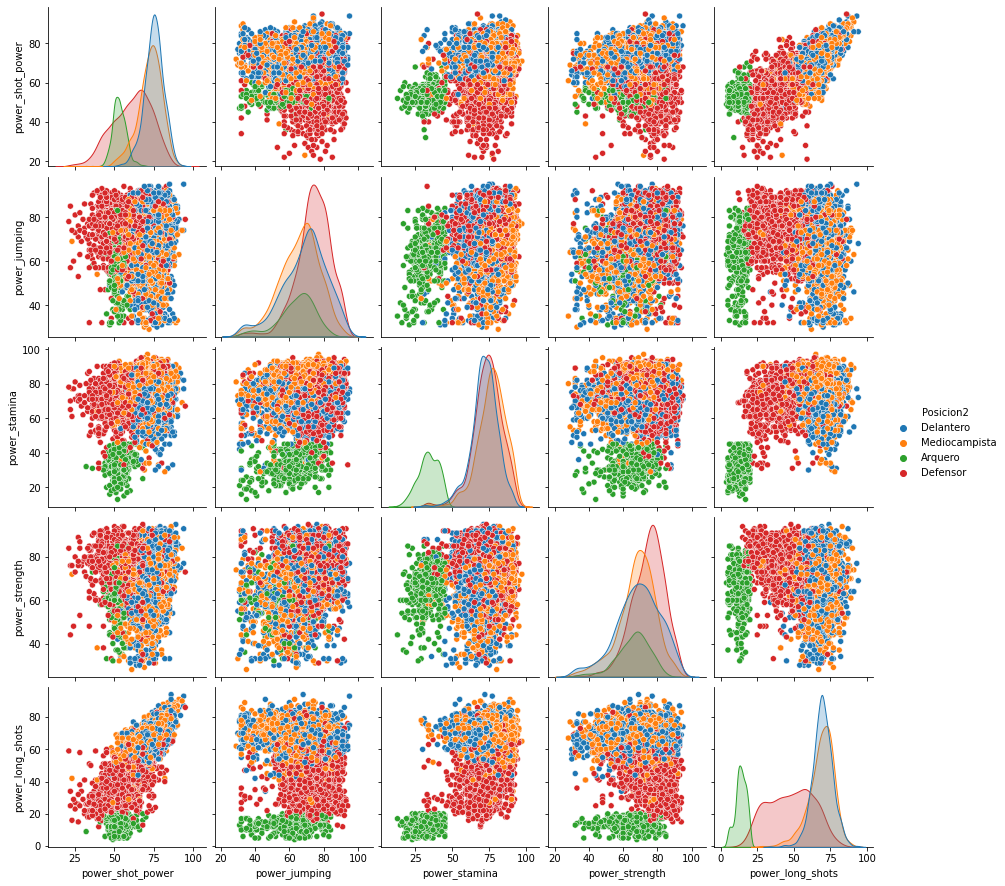

In [121]:
sns.pairplot(df_skills[skills_power], hue = 'Posicion2');